In [1]:
import pandas
import matplotlib
import math

results = pandas.read_csv('tmp/survey_results_public.csv', index_col=0)

# split languages, and replace column
results['HaveWorkedLanguage'] = results['HaveWorkedLanguage'].str.split('; ')
results['WantWorkLanguage'] = results['WantWorkLanguage'].str.split('; ')

In [2]:
cz_sk_selector = results['Country'].isin( ['Czech Republic', 'Slovak Republic'])

# preselect salaries
salaries = results['Salary']
salaries = salaries.dropna()

have_worked_language = results['HaveWorkedLanguage']
have_worked_language = have_worked_language.where((pandas.notnull(have_worked_language)), None)
have_worked_python   = have_worked_language.apply(lambda l: 'Python' in l if l != None else None)
have_worked_java     = have_worked_language.apply(lambda l: 'Java' in l if l != None else None)

want_work_language = results['WantWorkLanguage']
want_work_language = want_work_language.where((pandas.notnull(want_work_language)), None)
want_work_python   = want_work_language.apply(lambda l: 'Python' in l if l != None else None)
want_work_java     = want_work_language.apply(lambda l: 'Java' in l if l != None else None)

In [3]:
print('Kolik lidí celkem vyplnilo dotazník?')
print(len(results))

Kolik lidí celkem vyplnilo dotazník?
51392


In [4]:
print('Kolik z nich bylo z ČR/SR?')
print(len(results[ cz_sk_selector ] ))

Kolik z nich bylo z ČR/SR?
581


In [5]:
print('Jaká je, podle dotazníku, průměrná mzda programátorů v ČR/SR? Ve světě?')
print(' V ČR/SR: $%.2f' % (salaries[ cz_sk_selector ].mean()))
print('Ve světe: $%.2f' % (salaries.mean()))
print('Ve světe: $%.2f (mimo ČR/SR)' % (salaries[ ~cz_sk_selector ].mean()))

Jaká je, podle dotazníku, průměrná mzda programátorů v ČR/SR? Ve světě?
 V ČR/SR: $21211.71
Ve světe: $56298.48
Ve světe: $56578.32 (mimo ČR/SR)


In [6]:
print('Kolik lidí z ČR/SR uvedlo, že používá* Python?')
print(len(results[cz_sk_selector & have_worked_python]))

Kolik lidí z ČR/SR uvedlo, že používá* Python?
129


In [7]:
print('Kolik z nich chce v používání* Pythonu pokračovat?')
print(len(results[cz_sk_selector & have_worked_python & want_work_python]))

Kolik z nich chce v používání* Pythonu pokračovat?
86


In [8]:
print('(NEJEDNOZNAČNÉ ZADANIE, varianta: uviedlo nejaký jazyk, ale nie je medzi nimi Python)')
print('Kolik lidí Python nepoužívá, ale chce ho začít používat?')
print(len(results[ (have_worked_python == False) & want_work_python]))

(NEJEDNOZNAČNÉ ZADANIE, varianta: uviedlo nejaký jazyk, ale nie je medzi nimi Python)
Kolik lidí Python nepoužívá, ale chce ho začít používat?
5118


In [9]:
print('(NEJEDNOZNAČNÉ ZADANIE, varianta: neuvedlo žádny jazyk)')
print('Kolik lidí Python nepoužívá, ale chce ho začít používat?')
print(len(results[ (have_worked_python.isin([None,False])) & want_work_python]))

(NEJEDNOZNAČNÉ ZADANIE, varianta: neuvedlo žádny jazyk)
Kolik lidí Python nepoužívá, ale chce ho začít používat?
5230


In [10]:
print('Předcházející tři otázky odpovězte také pro Javu místo Pythonu.\n')
print(
    'Kolik lidí z ČR/SR uvedlo, že používá* Java:              ',
    len(results[cz_sk_selector & have_worked_java])
)
print(
    'Kolik z nich chce v používání* Java pokračovat:           ', 
    len(results[cz_sk_selector & have_worked_java & want_work_java])
)
print('(NEJEDNOZNAČNÉ ZADANIE, varianta: uviedlo nejaký jazyk, ale nie je medzi nimi Java)')
print(
    'Kolik lidí Java nepoužívá, ale chce ho začít používat:    ',
    len(results[ (have_worked_java==False) & want_work_java])
)
print('(NEJEDNOZNAČNÉ ZADANIE, varianta: neuvedlo žádny jazyk)')
print(
    'Kolik lidí Java nepoužívá, ale chce ho začít používat:    ',
    len(results[ have_worked_java.isin([None,False]) & want_work_java])
)

Předcházející tři otázky odpovězte také pro Javu místo Pythonu.

Kolik lidí z ČR/SR uvedlo, že používá* Java:               171
Kolik z nich chce v používání* Java pokračovat:            98
(NEJEDNOZNAČNÉ ZADANIE, varianta: uviedlo nejaký jazyk, ale nie je medzi nimi Java)
Kolik lidí Java nepoužívá, ale chce ho začít používat:     2544
(NEJEDNOZNAČNÉ ZADANIE, varianta: neuvedlo žádny jazyk)
Kolik lidí Java nepoužívá, ale chce ho začít používat:     2651


In [11]:
# src: https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
have_worked_language_table = have_worked_language.apply(pandas.Series,1).stack().reset_index(level=1, drop=True)
have_worked_language_table.name = 'Have worked language'

Vykreslete graf, který pro každý programovací jazyk, který lidi z ČR/SR uvedli, ukáže průměrnou měsíční mzdu lidí z ČR/SR, kteří tento jazyk používají* (podle dat dostupných z dotazníku).


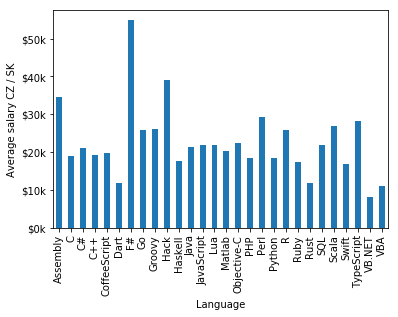

In [12]:
print('Vykreslete graf, který pro každý programovací jazyk, který lidi z ČR/SR uvedli, ukáže průměrnou měsíční mzdu lidí z ČR/SR, kteří tento jazyk používají* (podle dat dostupných z dotazníku).')

cz_sk_salaries = salaries[cz_sk_selector]
cz_sk_language_salaries = have_worked_language_table.to_frame().join(cz_sk_salaries).dropna()

average_cz_sk_language_salary = cz_sk_language_salaries.groupby('Have worked language').mean()
plot = average_cz_sk_language_salary.plot.bar(legend=False)

def kilo_dollars(x, pos):
    return '$%1.0fk' % (x*1e-3)

plot.set_xlabel('Language')
plot.set_ylabel('Average salary CZ / SK')
plot.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(kilo_dollars))
plot.get_figure().savefig('average_cz_sk_salary.png',bbox_inches='tight')

from IPython.display import Image
Image(filename='average_cz_sk_salary.png') 